In [3]:
#CNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pathlib
import natsort 
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [4]:
file_path = 'train'
file_names=[]
for file_name in glob.glob(os.path.join(file_path,'*png')):
    file_names.append(file_name)

file_names = natsort.natsorted(file_names)

In [5]:
cols = np.arange(1,785)

In [6]:
train_images_list=[]

In [7]:
for file_name in file_names[0:60000]:
    im = Image.open(file_name).convert('L')
    arr = np.asarray(im)
    train_images_list.append(np.ravel(arr).tolist())


In [8]:
df = pd.DataFrame(train_images_list, columns=cols)
print (df)

       1    2    3    4    5    6    7    8    9    10  ...   775  776  777  \
0        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
1        0    0    0    0    0    1    0    0    0    0 ...   119  113  130   
2        0    0    0    0    0    0    0    0    0   22 ...     0    0    1   
3        0    0    0    0    0    0    0    0   32   96 ...     0    0    0   
4        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
5        0    0    0    0    1    0    0    0    0   22 ...     0    0    0   
6        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
7        0    0    0    0    0    1    1    0    0    0 ...     0    0    3   
8        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
9        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
10       0    0    0    0    0    0    0   11  142  200 ...   120  110  158   
11       0    0    0    0    0    0    0    0    0  

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
updated_df = pd.concat([train,df],axis=1)

In [11]:
updated_df.head()

,id,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,119,113,130,76,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train = updated_df.iloc[:,2:786]
Y_train = updated_df.loc[:,'label']

In [13]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,113,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,32,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y_train.head()

0    9
1    0
2    0
3    3
4    0
Name: label, dtype: int64

In [20]:
x_train,x_cv,y_train,y_cv = train_test_split(X_train,Y_train,test_size = 0.3)

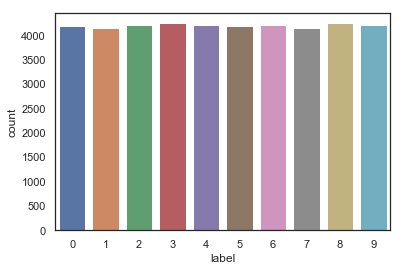

In [27]:
g = sns.countplot(y_train)

In [33]:
x_train = x_train / 255.0
x_cv = x_cv / 255.0

In [34]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
29773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
22638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.686275,0.686275,0.2,0.0,0.003922,0.0,0.0,0.0,0.0,0.0
33142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
14261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
22647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317647,...,0.603922,0.298039,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [35]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1,28,28,1)

In [39]:
x_train.shape

(42000, 28, 28, 1)

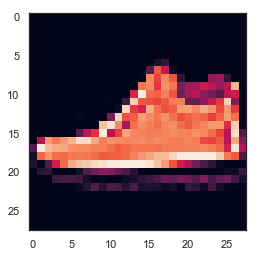

In [58]:
g = plt.imshow(x_train[0][:,:,0])

In [40]:
x_cv = x_cv.values.reshape(-1,28,28,1)

In [41]:
y_train = to_categorical(y_train, num_classes = 10)

In [69]:
y_cv = to_categorical(y_cv, num_classes = 10)

In [59]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [60]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [61]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [62]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [105]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86


In [106]:
# Without data augmentation i obtained an accuracy of 0.98114
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_cv, y_cv), verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 347s - loss: 0.3460 - acc: 0.8746 - val_loss: 0.2869 - val_acc: 0.8932
Epoch 2/30
 - 333s - loss: 0.3079 - acc: 0.8906 - val_loss: 0.2794 - val_acc: 0.8976
Epoch 3/30
 - 331s - loss: 0.2871 - acc: 0.8980 - val_loss: 0.2595 - val_acc: 0.9026
Epoch 4/30
 - 330s - loss: 0.2738 - acc: 0.9021 - val_loss: 0.2596 - val_acc: 0.9036
Epoch 5/30
 - 345s - loss: 0.2688 - acc: 0.9052 - val_loss: 0.2801 - val_acc: 0.9037
Epoch 6/30
 - 336s - loss: 0.2673 - acc: 0.9072 - val_loss: 0.2545 - val_acc: 0.9073
Epoch 7/30
 - 334s - loss: 0.2670 - acc: 0.9066 - val_loss: 0.2809 - val_acc: 0.9106
Epoch 8/30
 - 337s - loss: 0.2649 - acc: 0.9091 - val_loss: 0.2650 - val_acc: 0.9076
Epoch 9/30
 - 340s - loss: 0.2698 - acc: 0.9088 - val_loss: 0.2545 - val_acc: 0.9099
Epoch 10/30
 - 377s - loss: 0.2653 - acc: 0.9090 - val_loss: 0.2538 - val_acc: 0.9116
Epoch 11/30
 - 367s - loss: 0.2692 - acc: 0.9071 - val_loss: 0.2482 - val_acc: 0.9111
Epoch 12/30
 

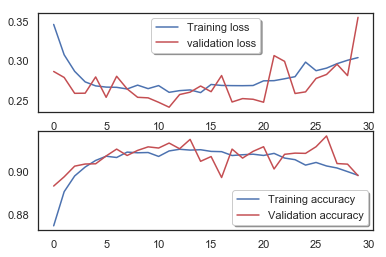

In [107]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

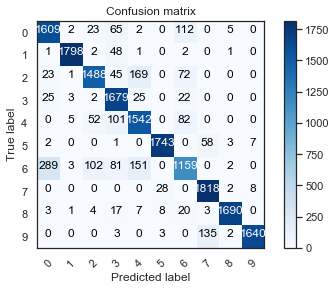

In [108]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_cv)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_cv,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

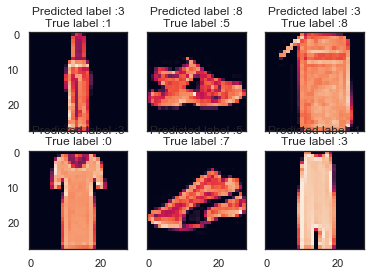

In [109]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_cv[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the trtrue label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [110]:
test.tail()

,id
9995,69996
9996,69997
9997,69998
9998,69999
9999,70000


In [111]:
file_path_test = 'test'
file_names_test=[]
for file_name in glob.glob(os.path.join(file_path_test,'*png')):
    file_names_test.append(file_name)

file_names_test = natsort.natsorted(file_names_test)

In [112]:
test_images_list=[]

In [113]:
for file_name in file_names_test[0:10000]:
    im = Image.open(file_name).convert('L')
    arr = np.asarray(im)
    test_images_list.append(np.ravel(arr).tolist())

In [114]:
df_test = pd.DataFrame(test_images_list, columns=cols)


In [115]:
df_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,163,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


In [116]:
updated_df_test = pd.concat([test,df_test],axis=1)

In [117]:
updated_df_test.head()

,id,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,60001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60002,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,60003,0,0,0,0,0,0,0,0,1,...,163,58,0,0,0,0,0,0,0,0
3,60004,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,60005,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0


In [118]:
x_test = updated_df_test.iloc[:,1:785]

In [119]:
x_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,163,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


In [120]:
x_test = x_test / 255.0

In [121]:
x_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.639216,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [122]:
x_test = x_test.values.reshape(-1,28,28,1)

In [123]:
# predict results
results = model.predict(x_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="label")

In [124]:
results

0       9
1       2
2       1
3       1
4       6
5       1
6       4
7       6
8       5
9       7
10      4
11      5
12      7
13      3
14      4
15      1
16      2
17      4
18      8
19      0
20      2
21      7
22      7
23      5
24      1
25      6
26      6
27      0
28      9
29      3
       ..
9970    2
9971    6
9972    0
9973    7
9974    7
9975    8
9976    5
9977    0
9978    9
9979    0
9980    0
9981    0
9982    8
9983    1
9984    3
9985    3
9986    7
9987    5
9988    8
9989    4
9990    5
9991    6
9992    8
9993    9
9994    1
9995    9
9996    1
9997    8
9998    1
9999    7
Name: label, Length: 10000, dtype: int64

In [125]:
submit = pd.concat([test,results],axis=1)

In [126]:
submit.to_csv('submission1.csv',index=False)